# The Privatization of Space

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

### Load the *Privatization of Space* Dataset

In [22]:
dat = pd.read_csv('Global_Space_Launches.csv')
dat.head()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12
1,CASIC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China,S,2020-08-06 04:01:00+00:00,2020,8,6,06/08/2020,04:01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,P,2020-08-04 23:57:00+00:00,2020,8,4,04/08/2020,23:57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Russia,S,2020-07-30 21:25:00+00:00,2020,7,30,30/07/2020,21:25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,P,2020-07-30 11:50:00+00:00,2020,7,30,30/07/2020,11:50


### Now let's bring in the NASA budget Dataset

In [23]:
budget = pd.read_csv('NASA_yearly_budget.csv')
budget

,Year,White House Budget Submission (In Millions of USD),% of U.S. Spending
0,1959,427.0,0.0016
1,1960,508.0,0.0043
2,1961,965.0,0.0076
3,1962,1940.0,0.0118
4,1963,3787.0,0.0229
...,...,...,...
65,2024,27185.0,NaN
66,2025,27728.7,NaN
67,2026,28283.2,NaN
68,2027,28848.9,NaN


### Dataset Merging

In [24]:
dat = pd.merge(budget, dat, on='Year', how='inner')


### Initial dataset analytics

Observe the first few rows

In [25]:
dat.head()

,Year,White House Budget Submission (In Millions of USD),% of U.S. Spending,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Month,Day,Date,Time
0,1959,427.0,0.0016,General Dynamics,"LC-14, Cape Canaveral AFS, Florida, USA",Atlas-D Able | Pioneer P-3,StatusRetired,NaN,Failure,USA,USA,P,1959-11-26 07:26:00+00:00,11,26,26/11/1959,07:26
1,1959,427.0,0.0016,US Air Force,"SLC-1E (75-3-5), Vandenberg AFB, California, USA",Thor-DM18 Agena-A | Discoverer 8,StatusRetired,NaN,Failure,USA,USA,S,1959-11-20 19:25:00+00:00,11,20,20/11/1959,19:25
2,1959,427.0,0.0016,US Air Force,"SLC-1W (75-3-4), Vandenberg AFB, California, USA",Thor-DM18 Agena-A | Discoverer 7,StatusRetired,NaN,Success,USA,USA,S,1959-11-07 20:28:00+00:00,11,7,07/11/1959,20:28
3,1959,427.0,0.0016,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Vostok | Luna-3,StatusRetired,NaN,Success,Kazakhstan,Russia,S,1959-10-04 00:43:00+00:00,10,4,04/10/1959,00:43
4,1959,427.0,0.0016,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard 3,StatusRetired,NaN,Partial Failure,USA,USA,S,1959-09-18 05:20:00+00:00,9,18,18/09/1959,05:20


List all the unique column values

In [26]:
dat.columns.to_list()

['Year',
 'White House Budget Submission (In Millions of USD)',
 '% of U.S.  Spending',
 'Company Name',
 'Location',
 'Detail',
 'Status Rocket',
 ' Rocket',
 'Status Mission',
 'Country of Launch',
 'Companys Country of Origin',
 'Private or State Run',
 'DateTime',
 'Month',
 'Day',
 'Date',
 'Time']

Remove unnessary columns from the dataset

In [27]:
cols_to_drop = [
    'Detail', 
    'Location', 
    'Month', 'Day', 
    'Time',]
dat = dat.drop(columns=cols_to_drop)

dat.head()

,Year,White House Budget Submission (In Millions of USD),% of U.S. Spending,Company Name,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Date
0,1959,427.0,0.0016,General Dynamics,StatusRetired,NaN,Failure,USA,USA,P,1959-11-26 07:26:00+00:00,26/11/1959
1,1959,427.0,0.0016,US Air Force,StatusRetired,NaN,Failure,USA,USA,S,1959-11-20 19:25:00+00:00,20/11/1959
2,1959,427.0,0.0016,US Air Force,StatusRetired,NaN,Success,USA,USA,S,1959-11-07 20:28:00+00:00,07/11/1959
3,1959,427.0,0.0016,RVSN USSR,StatusRetired,NaN,Success,Kazakhstan,Russia,S,1959-10-04 00:43:00+00:00,04/10/1959
4,1959,427.0,0.0016,US Navy,StatusRetired,NaN,Partial Failure,USA,USA,S,1959-09-18 05:20:00+00:00,18/09/1959


Rename columns to make more sense

In [28]:
dat['% of U.S. Spending'] = dat['% of U.S.  Spending']
dat.drop(columns=['% of U.S.  Spending'], inplace=True)

Subset the data for the U.S. since 1959

In [29]:
countries = ['USA']
dat = dat[dat['Country of Launch'].isin(countries)]
dat = dat[dat['Year'] >= 1959]
dat.head()

,Year,White House Budget Submission (In Millions of USD),Company Name,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Date,% of U.S. Spending
0,1959,427.0,General Dynamics,StatusRetired,NaN,Failure,USA,USA,P,1959-11-26 07:26:00+00:00,26/11/1959,0.0016
1,1959,427.0,US Air Force,StatusRetired,NaN,Failure,USA,USA,S,1959-11-20 19:25:00+00:00,20/11/1959,0.0016
2,1959,427.0,US Air Force,StatusRetired,NaN,Success,USA,USA,S,1959-11-07 20:28:00+00:00,07/11/1959,0.0016
4,1959,427.0,US Navy,StatusRetired,NaN,Partial Failure,USA,USA,S,1959-09-18 05:20:00+00:00,18/09/1959,0.0016
5,1959,427.0,US Air Force,StatusRetired,NaN,Failure,USA,USA,S,1959-09-17 14:34:00+00:00,17/09/1959,0.0016


How man rows(observations) do we have?

In [30]:
len(dat)

1327

### Observe Different Variable Values

What are the unique values for all the companies in the dataset? What organization has the most launches since the ISS was launched in 1998?

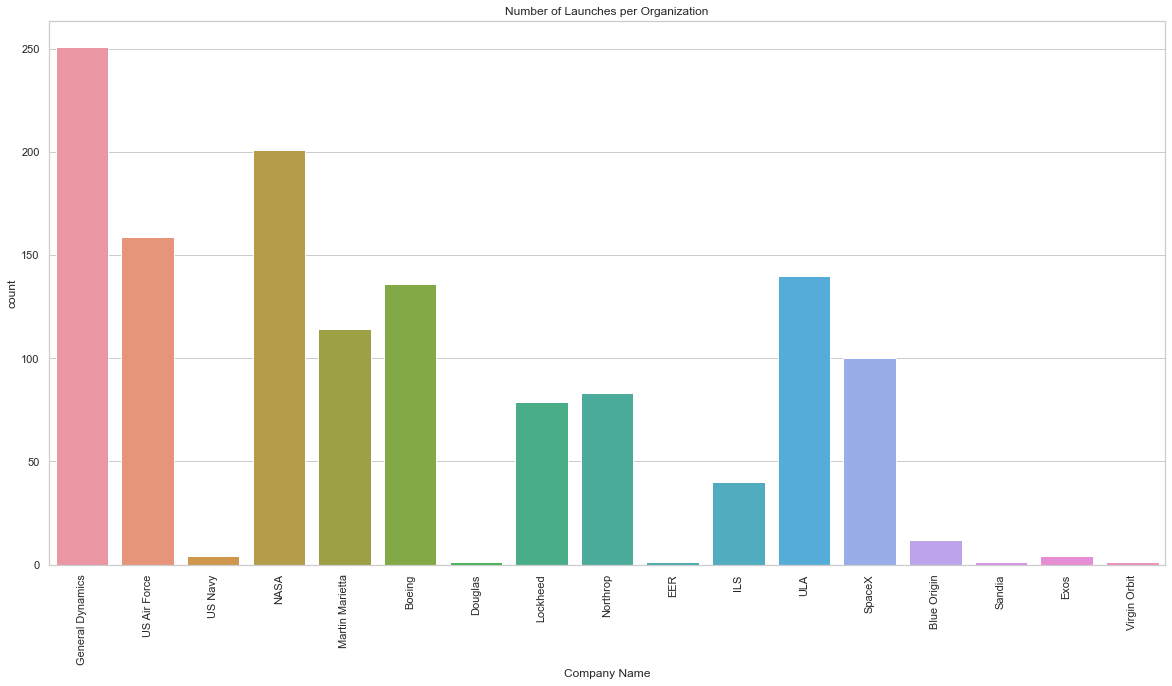

In [31]:
plt.figure(figsize=(20, 10))
x = sns.countplot(x=dat["Company Name"])
plt.title('Number of Launches per Organization')
for item in x.get_xticklabels():
    item.set_rotation(90)

How has the NASA budget (as a proportion of the total budget and in USD) changed over time?

<AxesSubplot:xlabel='Year', ylabel='White House Budget Submission (In Millions of USD)'>

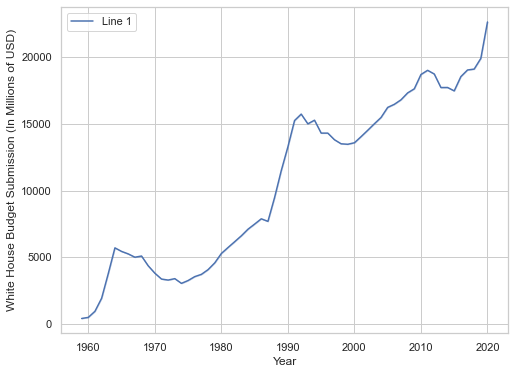

In [32]:
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(8, 6))  # Set the figure size
sns.lineplot(y=dat['White House Budget Submission (In Millions of USD)'], x=dat['Year'], label="Line 1")  # Plot the first line

<AxesSubplot:xlabel='Year', ylabel='% of U.S. Spending'>

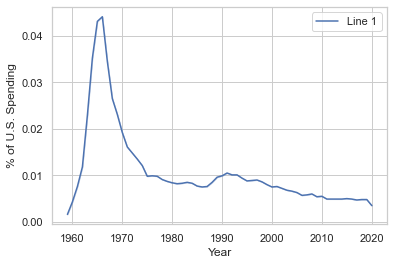

In [33]:
sns.lineplot(y=dat['% of U.S. Spending'], x=dat['Year'], label="Line 1")  # Plot the first line

A barplot describing the number of launches per year, showing whether it was a private or state organization that conducted the launch.

<Figure size 576x432 with 0 Axes>

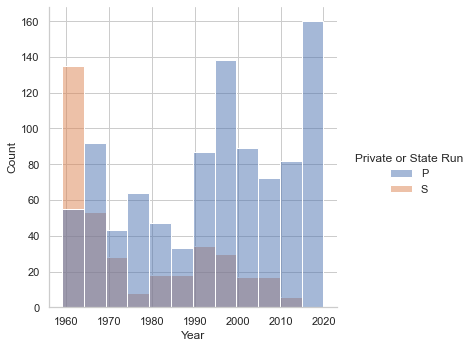

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.displot(x='Year', hue='Private or State Run', data=dat)

Rocket launch success, divided by type (private/state).

<AxesSubplot:xlabel='Status Mission', ylabel='Count'>

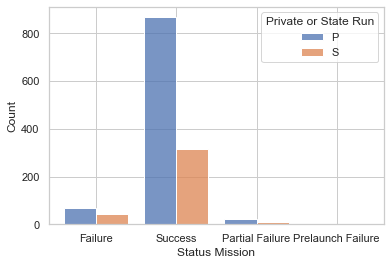

In [35]:
sns.histplot(
    data=dat, x="Status Mission", hue="Private or State Run", multiple="dodge", shrink=.8
)

But how does this look proportionally?

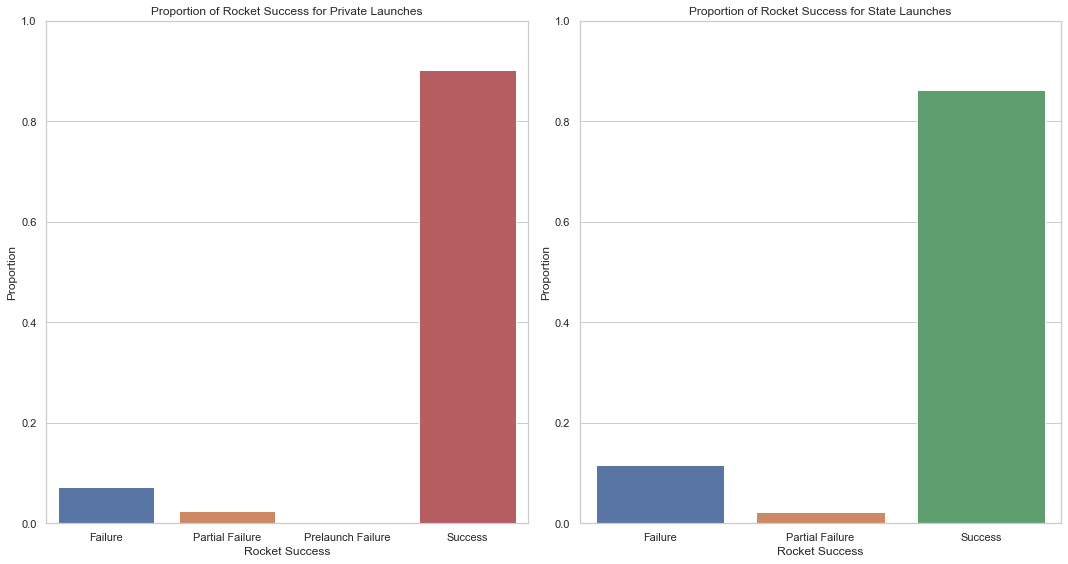

In [102]:
# Calculate proportions for private launches
private_proportions = dat[dat['Private or State Run'] == 'P'].groupby('Status Mission').size() / len(dat[dat['Private or State Run'] == 'P'])

# Calculate proportions for state launches
state_proportions = dat[dat['Private or State Run'] == 'S'].groupby('Status Mission').size() / len(dat[dat['Private or State Run'] == 'S'])

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Private launches plot
sns.barplot(x=private_proportions.index, y=private_proportions.values, ax=axes[0])
axes[0].set_title('Proportion of Rocket Success for Private Launches')
axes[0].set_xlabel('Rocket Success')
axes[0].set_ylabel('Proportion')
axes[0].set_ylim(0, 1)  # Set y-axis limits to ensure proportions are within range

# State launches plot
sns.barplot(x=state_proportions.index, y=state_proportions.values, ax=axes[1])
axes[1].set_title('Proportion of Rocket Success for State Launches')
axes[1].set_xlabel('Rocket Success')
axes[1].set_ylabel('Proportion')
axes[1].set_ylim(0, 1)  # Set y-axis limits to ensure proportions are within range

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



### Creating a Linear Regression Model

I want to model the relationship between NASA's budget (as a proportion of the total U.S. budget) and the proportion of state-run launches for each year.

In [37]:
state_proportions = dat[dat['Private or State Run'] == 'S'].groupby('Year').size() / dat.groupby('Year').size()

# Prepare data for linear regression
X = dat['% of U.S. Spending']
y_proportions = dat['Year'].map(state_proportions)  # Use a different name for y

# Combine X and y into a DataFrame
regression_data = pd.DataFrame({'X': X, 'y': y_proportions})

# Drop rows with missing values
regression_data = regression_data.dropna()

# Add a constant term to the predictor
X = sm.add_constant(regression_data['X'])

# Fit linear regression model
model = sm.OLS(regression_data['y'], X).fit()

# Print regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.02560
Date:                Fri, 01 Sep 2023   Prob (F-statistic):              0.873
Time:                        09:08:22   Log-Likelihood:                 92.446
No. Observations:                1079   AIC:                            -180.9
Df Residuals:                    1077   BIC:                            -170.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3396      0.011     32.077      0.0

/Users/lillyamirjavadi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


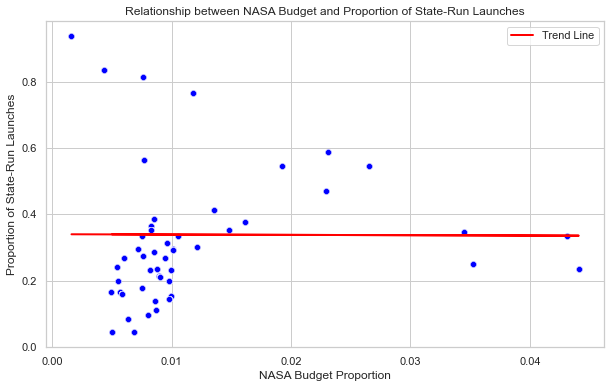

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='y', data=regression_data, color='blue')
plt.plot(regression_data['X'], model.predict(X), color='red', linewidth=2, label='Trend Line')
plt.xlabel('NASA Budget Proportion')
plt.ylabel('Proportion of State-Run Launches')
plt.title('Relationship between NASA Budget and Proportion of State-Run Launches')
plt.legend()
plt.show()

Standardizing the independent variable

In [39]:
from sklearn.preprocessing import StandardScaler


# Calculate proportions of state-run launches for each year
state_proportions = dat[dat['Private or State Run'] == 'S'].groupby('Year').size() / dat.groupby('Year').size()

# Prepare data for linear regression
X = dat['% of U.S. Spending']
y = dat['Year'].map(state_proportions)

# Standardize the independent variable
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X.values.reshape(-1, 1))

# Combine X and y into a DataFrame
regression_data = pd.DataFrame({'X': X_standardized.flatten(), 'y': y})

# Drop rows with missing values
regression_data = regression_data.dropna()

# Add a constant term to the predictor
X = sm.add_constant(regression_data['X'])

# Fit linear regression model
model = sm.OLS(regression_data['y'], X).fit()

# Print regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.02560
Date:                Fri, 01 Sep 2023   Prob (F-statistic):              0.873
Time:                        09:08:22   Log-Likelihood:                 92.446
No. Observations:                1079   AIC:                            -180.9
Df Residuals:                    1077   BIC:                            -170.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3384      0.007     49.569      0.0

/Users/lillyamirjavadi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


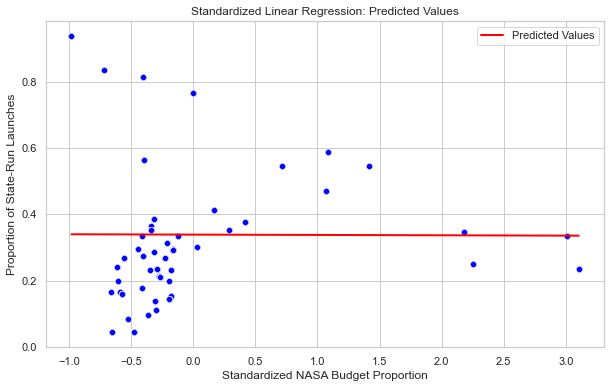

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='y', data=regression_data, color='blue')

# Plot predicted values
x_vals = np.linspace(X['X'].min(), X['X'].max(), 100)
y_vals = model.predict(sm.add_constant(x_vals))
plt.plot(x_vals, y_vals, color='red', linewidth=2, label='Predicted Values')

plt.xlabel('Standardized NASA Budget Proportion')
plt.ylabel('Proportion of State-Run Launches')
plt.title('Standardized Linear Regression: Predicted Values')
plt.legend()
plt.show()

### Analyzing launch cost 

There are a lot of missing values here. This would decrease the accuracy and xternal validity of results, but I think it is still a relationship worth exploring.

In [41]:
dat2 = dat
dat2.head(1)

,Year,White House Budget Submission (In Millions of USD),Company Name,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Date,% of U.S. Spending
0,1959,427.0,General Dynamics,StatusRetired,NaN,Failure,USA,USA,P,1959-11-26 07:26:00+00:00,26/11/1959,0.0016


In [48]:
dat2.rename(columns = {' Rocket':'Cost'}, inplace = True)
dat2.columns

Index(['Year', 'White House Budget Submission (In Millions of USD)',
       'Company Name', 'Status Rocket', 'Cost', 'Status Mission',
       'Country of Launch', 'Companys Country of Origin',
       'Private or State Run', 'DateTime', 'Date', '% of U.S. Spending'],
      dtype='object')

In [55]:
dat2['Cost'].isnull().values.sum()


837

In [58]:
dat2 = dat2.dropna()
dat2.head()
len(dat2)

490

<AxesSubplot:xlabel='Private or State Run', ylabel='count'>

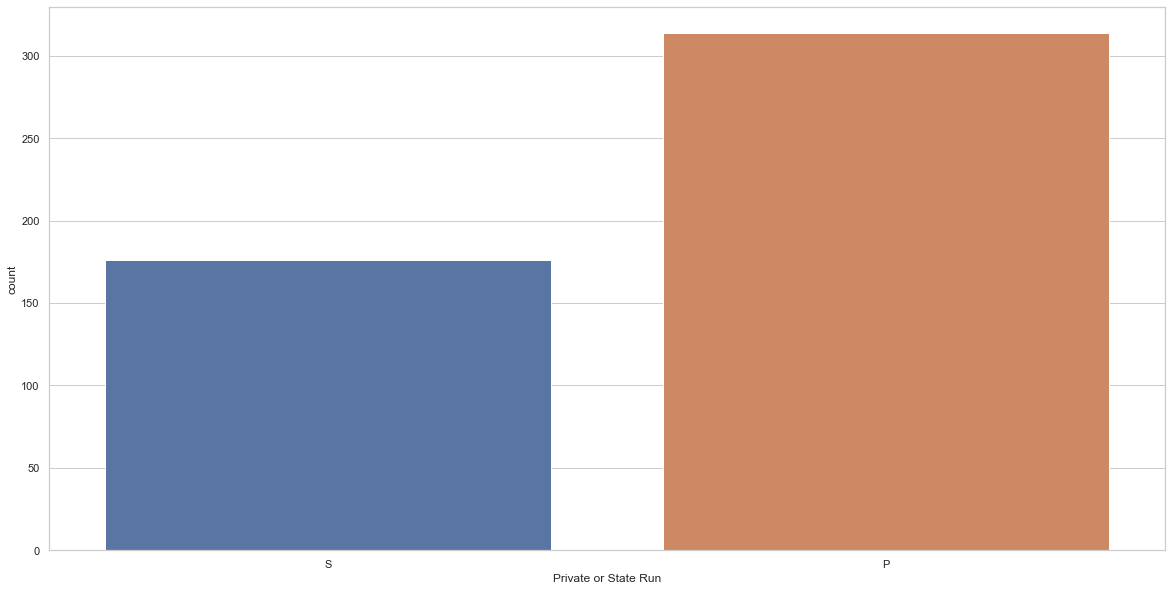

In [60]:
plt.figure(figsize=(20, 10))
x = sns.countplot(x=dat2["Private or State Run"])
x

<AxesSubplot:xlabel='Year', ylabel='Cost'>

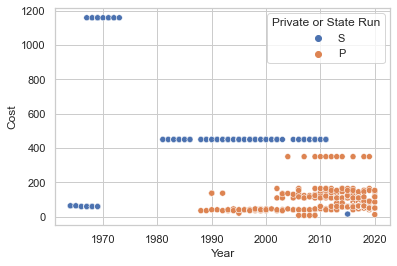

In [91]:
sns.scatterplot(y=dat2['Cost'], x=dat2['Year'], hue = dat2['Private or State Run'])  # Plot the first line

In [84]:
dat2[['Cost', "Year"]]

,Cost,Year
235,63.23,1964
255,63.23,1964
353,63.23,1965
375,63.23,1965
385,59.00,1966
...,...,...
4099,145.00,2018
4101,62.00,2018
4104,90.00,2018
4108,62.00,2018


In [93]:
# Prepare data for linear regression
X = dat2['% of U.S. Spending']
y = dat2['Cost']

# Combine X and y into a DataFrame
regression_data = pd.DataFrame({'X': X, 'y': y})

# Drop rows with missing values
regression_data = regression_data.dropna()

# Add a constant term to the predictor
X = sm.add_constant(regression_data['X'])

# Fit linear regression model
model = sm.OLS(regression_data['y'], X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     22.37
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           2.95e-06
Time:                        09:34:30   Log-Likelihood:                -3351.7
No. Observations:                 490   AIC:                             6707.
Df Residuals:                     488   BIC:                             6716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        155.4437     16.209      9.590      0.0

/Users/lillyamirjavadi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


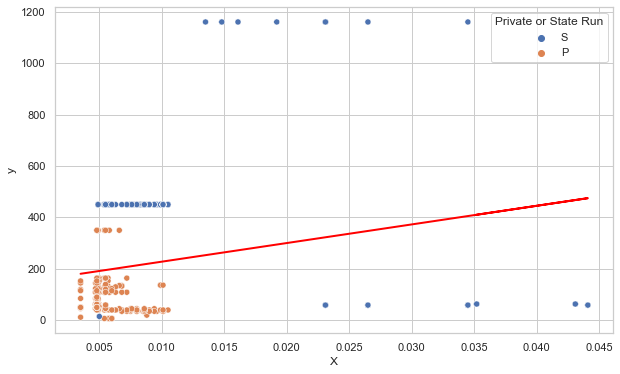

In [98]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='y', data=regression_data, hue = dat2["Private or State Run"], color='blue')
plt.plot(regression_data['X'], model.predict(X), color='red', linewidth=2, label='Trend Line')

Now try with standardizing

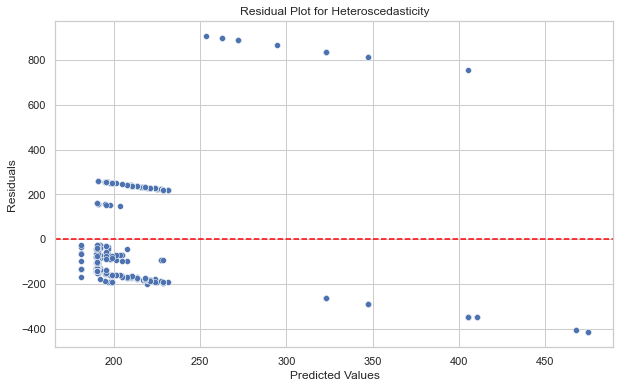

In [99]:
residuals = model.resid

# Create a residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.predict(), y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Heteroscedasticity')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at zero for reference
plt.show()